In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.style.use('seaborn-notebook')

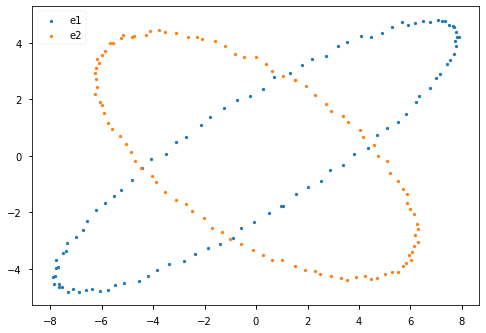

In [2]:
pi = float(np.pi)
N = 100
trange = np.linspace(0, 2*pi, N)
X1 = 2 * np.cos(trange)
Y1 = 9 * np.sin(trange)
X2 = 3 * np.cos(trange)
Y2 = 7 * np.sin(trange)
XY1 = np.c_[X1,Y1]
XY2 = np.c_[X2,Y2]

C1 = np.array([[np.cos(pi/3), -np.sin(pi/3)],[np.sin(pi/3), np.cos(pi/3)]])
XY1_C_orig = XY1 @ C1
C2 = np.array([[np.cos(-pi/3), -np.sin(-pi/3)],[np.sin(-pi/3), np.cos(-pi/3)]])
XY2_C_orig = XY2 @ C2

XY1_o1 = XY1_C_orig + (2*np.random.random(size=(N,2))-1) * 0.1
XY2_o1 = XY2_C_orig + (2*np.random.random(size=(N,2))-1) * 0.1

Z = np.zeros(N, 'd')

plt.scatter(XY1_o1[:,0], XY1_o1[:,1], label='e1', s=9)
plt.scatter(XY2_o1[:,0], XY2_o1[:,1], label='e2', s=9)
plt.legend()
plt.show()

In [3]:
import mlgrad
import mlgrad.model as ml_model
import mlgrad.risk as ml_risk
import mlgrad.loss as ml_loss
import mlgrad.weights as ml_weights
import mlgrad.func as ml_func
import mlgrad.af as ml_af

In [4]:
layer = ml_model.GeneralModelLayer(2)
mod1 = ml_model.EllipticModel(2)
mod2 = ml_model.EllipticModel(2)
layer.append(mod1)
layer.append(mod2)
nn = ml_model.FFNetworkModel()
nn.add(layer)

nn.allocate()
print(np.asarray(nn.param))
nn.init_param()
print(np.asarray(nn.param))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0.]
[0.35749174 0.72182509]
[0. 0. 0.]
[0. 0. 0.]
[1. 0. 1.]
[0. 0.]
[0.45860931 0.90484626]
[0. 0. 0.]
[0. 0. 0.]
[1. 0. 1.]
[0.35749174 0.72182509 1.         0.         1.         0.45860931
 0.90484626 1.         0.         1.        ]


In [5]:
minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.SoftAbs(0.001)), 2, a=10)
risk = ml_risk.ER21(XY1_o1, Z, nn, minloss)

2739
[ 7.31750859e-01 -4.32474656e-01 -1.72157364e-06  5.63438127e-06
 -3.48409684e-06 -6.90966094e-02  2.53406906e+00  8.86961788e-02
 -3.78357601e-01  3.53226256e-01]
[ 0.73175086 -0.43247466] [-1.72157364e-06  5.63438127e-06 -3.48409684e-06]
[-0.06909661  2.53406906] [ 0.08869618 -0.3783576   0.35322626]


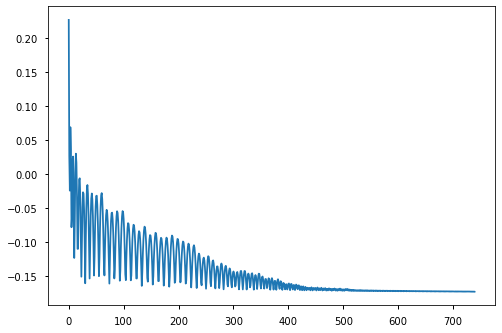

In [7]:
alg = mlgrad.erm_fg(risk, n_restart=5, h=0.001)
print(alg.K)
print(np.asarray(nn.param))
print(np.asarray(mod1.c), np.asarray(mod1.S))
print(np.asarray(mod2.c), np.asarray(mod2.S))

plt.plot(alg.lvals)
plt.show()